In [84]:
import pandas as pd

In [85]:
data= 'https://github.com/nbennett4025/Data/raw/master/ballotinitiativesWA.xlsx'

In [86]:
ballot=pd.read_excel(data,0)
ballot.dtypes

Jurisdiction                         object
County                               object
Government Type                      object
Subject                              object
Ballot Measure Text                  object
Election Results                     object
Yes %                               float64
No %                                float64
Election Month                       object
Election Year                         int64
Duration in Years Levy/Fee           object
Amount of Levy (Per $1000 A/V)      float64
Tax Amount                          float64
Bond Amount                         float64
Funding Type/Statutory Authority     object
dtype: object

In [87]:
ballotyes=ballot['Yes %']

In [88]:
ballotyes.describe()

count    1434.000000
mean       62.784426
std        14.206475
min         0.000000
25%        54.750000
50%        64.575000
75%        72.442500
max       100.000000
Name: Yes %, dtype: float64

In [89]:
ballotyes.mean()

62.78442629009772

In [90]:
ballotyes.skew()

-0.64296411152460098

In [91]:
ballotyes.kurt()

0.88296249539900984

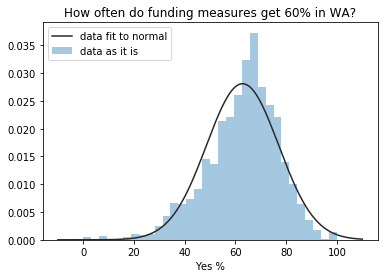

In [92]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(ballotyes.dropna(),kde=False,fit=norm)
plt.legend(('data fit to normal','data as it is'))
plt.title('How often do funding measures get 60% in WA?')
plt.show()

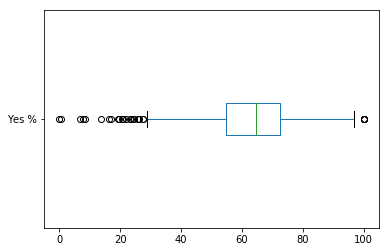

In [93]:
plot,dataBP=ballotyes.plot.box(vert=False,return_type='both')
plt.show()
#looks like the data have a longer left tail, but are generally close to being 
#'normal'. On average it seems like things get the required 60% about
# a little more than half of the time

In [94]:
#Moving on to bi-variate analysis
from scipy import stats

In [95]:
ballot['Government Type'].value_counts()

City                                      481
Fire Protection District                  425
Park District                             161
County                                    110
Cemetery District                          60
Public Hospital District                   58
Transportation Benefit District            40
Port District                              20
Emergency Medical Services District        16
Water-Sewer District                       14
Library District                           13
Public Transportation Benefit Area         13
Public Facilities District                  7
Solid Waste Disposal District               6
Mosquito Control District                   4
Public Utility District                     2
County Public Transportation Authority      2
Flood Control Zone District                 1
Regional Transit Authority                  1
Name: Government Type, dtype: int64

In [96]:
values = list(ballot['Government Type'].value_counts().index)
values


    

['City',
 'Fire Protection District',
 'Park District',
 'County',
 'Cemetery District',
 'Public Hospital District',
 'Transportation Benefit District',
 'Port District',
 'Emergency Medical Services District',
 'Water-Sewer District',
 'Library District',
 'Public Transportation Benefit Area',
 'Public Facilities District',
 'Solid Waste Disposal District',
 'Mosquito Control District',
 'Public Utility District',
 'County Public Transportation Authority',
 'Flood Control Zone District',
 'Regional Transit Authority']

In [97]:
city = values[0]
county = values[3]
govsimple = []

for value in ballot['Government Type']:
    if value in city:
        govsimple.append('City')
    else:
        if value in county:
            govsimple.append('County')
        else:
            govsimple.append('Special District')
    

In [98]:
ballot['govsimple'] = govsimple

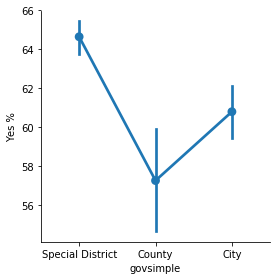

In [99]:
sns.factorplot(x='govsimple', y= 'Yes %', data=ballot)
plt.show()

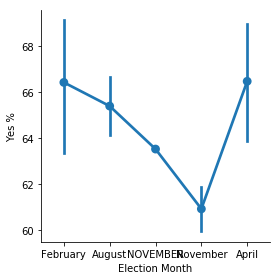

In [100]:
# it would seem that counties have a harder time passing funding than cities
# or special districts
#Does the month of the election matter?
sns.factorplot(x='Election Month', y= 'Yes %', data=ballot)
plt.show()

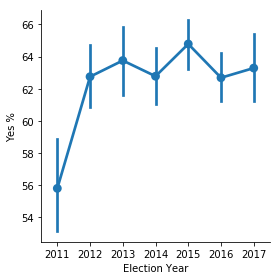

In [101]:
sns.factorplot(x='Election Year', y= 'Yes %', data=ballot)
plt.show()
#looks like 2011 was a bad year for funding

In [102]:
#looking a little closer
ballot['Election Year'].value_counts()

2016    252
2015    247
2017    213
2013    211
2012    205
2014    195
2011    111
Name: Election Year, dtype: int64

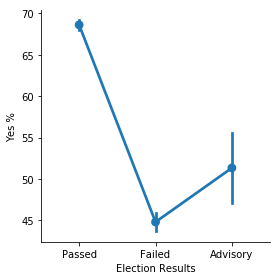

In [103]:
#now the dumb one
sns.factorplot(x='Election Results', y= 'Yes %', data=ballot)
plt.show()

In [105]:
#time for some correlations
ballot.dtypes

Jurisdiction                         object
County                               object
Government Type                      object
Subject                              object
Ballot Measure Text                  object
Election Results                     object
Yes %                               float64
No %                                float64
Election Month                       object
Election Year                         int64
Duration in Years Levy/Fee           object
Amount of Levy (Per $1000 A/V)      float64
Tax Amount                          float64
Bond Amount                         float64
Funding Type/Statutory Authority     object
govsimple                            object
dtype: object

In [106]:
yes = ballot['Yes %']
no = ballot['No %']
duration = ballot['Duration in Years Levy/Fee']
levy = ballot['Amount of Levy (Per $1000 A/V)']
tax = ballot['Tax Amount']
bond = ballot['Bond Amount']

In [107]:
data={'yes':yes, 'no':no, 'duration':duration, 'levy':levy, 'tax':tax, 'bond':bond}
data

{'bond': 0             NaN
 1             NaN
 2             NaN
 3             NaN
 4             NaN
 5             NaN
 6             NaN
 7             NaN
 8             NaN
 9             NaN
 10            NaN
 11            NaN
 12            NaN
 13            NaN
 14            NaN
 15            NaN
 16            NaN
 17            NaN
 18            NaN
 19            NaN
 20            NaN
 21            NaN
 22            NaN
 23            NaN
 24            NaN
 25            NaN
 26            NaN
 27            NaN
 28            NaN
 29            NaN
           ...    
 1404          NaN
 1405    3500000.0
 1406          NaN
 1407          NaN
 1408          NaN
 1409          NaN
 1410          NaN
 1411          NaN
 1412          NaN
 1413    7990000.0
 1414          NaN
 1415          NaN
 1416          NaN
 1417          NaN
 1418          NaN
 1419          NaN
 1420          NaN
 1421          NaN
 1422          NaN
 1423          NaN
 1424          NaN
 142

In [72]:
ballotcorr = pd.DataFrame.from_dict(data)
ballotcorr

bond                        duration  levy     no     tax     yes
0           NaN                               6   NaN  37.17  0.0013   62.83
1           NaN                               1  0.21  23.16     NaN   76.84
2           NaN                               1  0.27  29.03     NaN   70.97
3           NaN                               1  0.27  14.78     NaN   85.22
4           NaN                               1  0.19  18.18     NaN   81.82
5           NaN                               1  0.26  14.06     NaN   85.94
6           NaN                               1  0.26  16.30     NaN   84.70
7           NaN                               1  0.02  36.48     NaN   63.52
8           NaN                               1  0.02  49.14     NaN   50.86
9           NaN                               1  0.11  42.38     NaN   57.62
10          NaN                               1  0.12  38.88     NaN   61.12
11          NaN                               1  0.12  38.49     NaN   61.51
12          NaN                               1  0.12  32.94     NaN   67.06
13          NaN                               1  0.15  34.09     NaN   65.91
14          NaN                               1  0.16  35.33     NaN   64.97
15          NaN                               1  0.66   0.00     NaN  100.00
16          NaN                               1  1.35  27.27     NaN   72.73
17          NaN                               1  1.35   0.00     NaN  100.00
18          NaN                               1  1.35   0.00     NaN  100.00
19          NaN                               1  1.35   0.00     NaN  100.00
20          NaN                               1  1.35   0.00     NaN  100.00
21          NaN                               2  0.43   3.92     NaN   96.08
22          NaN                               2  0.47  10.71     NaN   89.29
23          NaN                               1  0.73  38.52     NaN   61.48
24          NaN                               1  1.08  31.50     NaN   68.50
25          NaN                               1  1.11  43.24     NaN   56.76
26          NaN                               1  0.24  30.65     NaN   69.35
27          NaN                               1  0.24  35.41     NaN   64.59
28          NaN                               1  0.25  26.43     NaN   73.57
29          NaN                               1  0.24  33.91     NaN   66.09
...         ...                             ...   ...    ...     ...     ...
1404        NaN                               6  0.25  37.21     NaN   62.79
1405  3500000.0                              30   NaN  29.94     NaN   70.07
1406        NaN                             NaN   NaN  29.74     NaN   70.26
1407        NaN                             NaN   NaN  23.48     NaN   76.52
1408        NaN                              10   0.5  15.79     NaN   84.21
1409        NaN                               6   NaN  11.90     NaN   88.10
1410        NaN                    1, permanent  2.84  50.70     NaN   49.30
1411        NaN                             NaN   NaN  45.22     NaN   54.78
1412        NaN                             NaN   NaN  45.85   0.001   54.15
1413  7990000.0                              20   NaN  51.00     NaN   49.00
1414        NaN                              10   NaN  52.55   0.002   47.45
1415        NaN                              10   NaN  51.56   0.002   48.44
1416        NaN         Single-year (permanent)  2.48  60.32     NaN   39.68
1417        NaN                               1   1.4  10.26     NaN   89.74
1418        NaN                               1   1.5  19.07     NaN   80.93
1419        NaN                               1     1  64.86     NaN   35.14
1420        NaN                             NaN   NaN  31.31     NaN   68.69
1421        NaN                             NaN   NaN  32.60     NaN   67.40
1422        NaN                             NaN   NaN  27.61     NaN   72.39
1423        NaN                             NaN   NaN  41.06     NaN   58.94
1424   

In [108]:
#looks like duration is going to be a problem
ballotcorr.drop('duration',axis=1,inplace=True)

ValueError: labels ['duration'] not contained in axis

In [109]:
ballotcorr

bond  levy     no     tax     yes
0           NaN   NaN  37.17  0.0013   62.83
1           NaN  0.21  23.16     NaN   76.84
2           NaN  0.27  29.03     NaN   70.97
3           NaN  0.27  14.78     NaN   85.22
4           NaN  0.19  18.18     NaN   81.82
5           NaN  0.26  14.06     NaN   85.94
6           NaN  0.26  16.30     NaN   84.70
7           NaN  0.02  36.48     NaN   63.52
8           NaN  0.02  49.14     NaN   50.86
9           NaN  0.11  42.38     NaN   57.62
10          NaN  0.12  38.88     NaN   61.12
11          NaN  0.12  38.49     NaN   61.51
12          NaN  0.12  32.94     NaN   67.06
13          NaN  0.15  34.09     NaN   65.91
14          NaN  0.16  35.33     NaN   64.97
15          NaN  0.66   0.00     NaN  100.00
16          NaN  1.35  27.27     NaN   72.73
17          NaN  1.35   0.00     NaN  100.00
18          NaN  1.35   0.00     NaN  100.00
19          NaN  1.35   0.00     NaN  100.00
20          NaN  1.35   0.00     NaN  100.00
21          NaN  0.43   3.92     NaN   96.08
22          NaN  0.47  10.71     NaN   89.29
23          NaN  0.73  38.52     NaN   61.48
24          NaN  1.08  31.50     NaN   68.50
25          NaN  1.11  43.24     NaN   56.76
26          NaN  0.24  30.65     NaN   69.35
27          NaN  0.24  35.41     NaN   64.59
28          NaN  0.25  26.43     NaN   73.57
29          NaN  0.24  33.91     NaN   66.09
...         ...   ...    ...     ...     ...
1404        NaN  0.25  37.21     NaN   62.79
1405  3500000.0   NaN  29.94     NaN   70.07
1406        NaN   NaN  29.74     NaN   70.26
1407        NaN   NaN  23.48     NaN   76.52
1408        NaN   0.5  15.79     NaN   84.21
1409        NaN   NaN  11.90     NaN   88.10
1410        NaN  2.84  50.70     NaN   49.30
1411        NaN   NaN  45.22     NaN   54.78
1412        NaN   NaN  45.85   0.001   54.15
1413  7990000.0   NaN  51.00     NaN   49.00
1414        NaN   NaN  52.55   0.002   47.45
1415        NaN   NaN  51.56   0.002   48.44
1416        NaN  2.48  60.32     NaN   39.68
1417        NaN   1.4  10.26     NaN   89.74
1418        NaN   1.5  19.07     NaN   80.93
1419        NaN     1  64.86     NaN   35.14
1420        NaN   NaN  31.31     NaN   68.69
1421        NaN   NaN  32.60     NaN   67.40
1422        NaN   NaN  27.61     NaN   72.39
1423        NaN   NaN  41.06     NaN   58.94
1424        NaN   NaN  25.84   0.003   74.16
1425        NaN   NaN  52.79   0.001   47.21
1426        NaN  0.25  21.62     NaN   78.38
1427        NaN   NaN  66.67     NaN   33.33
1428        NaN     1  35.83     NaN   64.17
1429  2200000.0   NaN  33.19     NaN   66.81
1430        NaN     1  24.83     NaN   75.17
1431        NaN     1  28.91     NaN   71.09
1432  5742000.0   NaN  47.86     NaN   52.14
1433  5742000.0   NaN  45.52     NaN   54.48

[1434 rows x 5 columns]

In [110]:
ballotcorr.corr()

bond        no       yes
bond  1.000000 -0.075546  0.075543
no   -0.075546  1.000000 -0.979699
yes   0.075543 -0.979699  1.000000

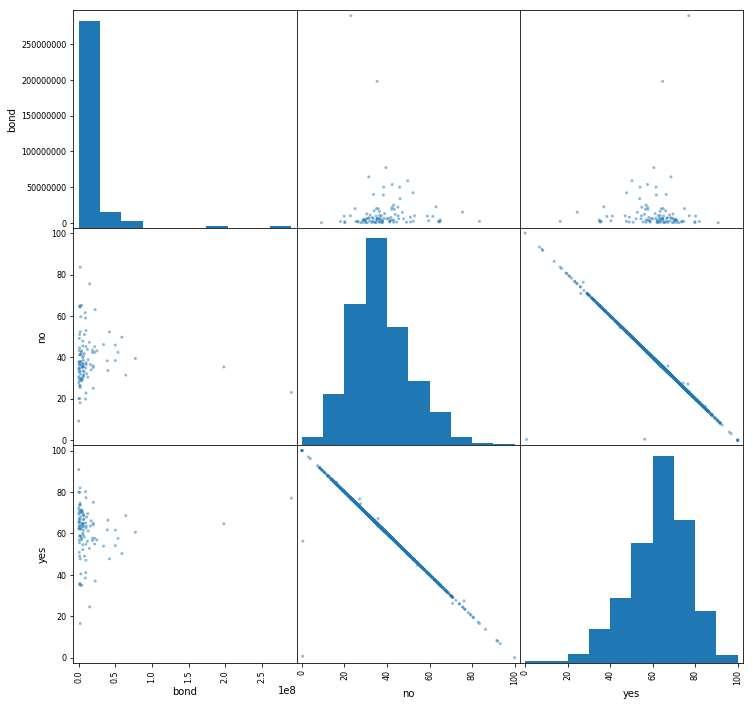

In [111]:
pd.plotting.scatter_matrix(ballotcorr,figsize=(12,12))
plt.show()